In [1]:
pip install ndlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 8.1 MB/s 
     |████████████████████████████████| 3.1 MB 38.9 MB/s 
  Created wheel for python-igraph: filename=python_igraph-0.9.11-py3-none-any.whl size=9074 sha256=fc40ce44ff86e756af7bbcfe7e5315d0043aaf7392e967849e0ea4e586ae4bae
  Stored in directory: /root/.cache/pip/wheels/7d/e4/0c/0c83f70bd0b99ce8aea47a21f8e52502169e7dd17808d12f30
Successfully built python-igraph


In [2]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

In [3]:
k_top10=pd.read_csv("k_top10_result_football.csv")
G= nx.read_edgelist("football.txt", nodetype = int)

In [4]:
k_top10

,Unnamed: 0,BC,CC,EC,TOPSIS,k_means
0,0,0,0,28,0,28
1,1,64,106,114,64,4
2,2,106,41,103,106,80
3,3,41,80,52,41,67
4,4,74,4,82,74,49
5,5,46,28,101,46,9
6,6,80,114,81,80,94
7,7,24,35,108,24,59
8,8,83,25,61,83,104
9,9,4,67,113,4,34


In [5]:

def si_model(measure): # fonction de model si 
    top=set(k_top10[measure].values.tolist())
    model = ep.SIModel(G)
    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta',0.3)
    cfg.add_model_initial_configuration("Infected", top)
    model.set_initial_status(cfg)
    iterations = model.iteration_bunch(10)
    S=[]
    I=[]
    it=[]
    for t in iterations:
        S.append(t['node_count'][0])
        I.append(t['node_count'][1])
        it.append(t['iteration'])
        if t['node_count'][1]==4039:
            break
    row=[it,I,S]
    return(row)


In [6]:
DC=[]
CC=[]
BC=[]
EC=[]
TOPSIS=[]
KMEANS=[]
#for i in r

CC.append(si_model('CC'))
BC.append(si_model('BC'))
EC.append(si_model('EC'))
TOPSIS.append(si_model('TOPSIS'))
KMEANS.append(si_model('k_means'))

In [7]:
def Std_mean(lis):# le moyanne stondare pour commancer 
    dc={}
    for i in range(1):
        for j in range(len(lis[i][0])):
            dc[lis[i][0][j]]=[]

    for i in range(1):
        for j in range(len(lis[i][0])):
            dc[lis[i][0][j]].append(lis[i][1][j])
    return dc


In [8]:
stdsCC=[]
meansCC=[]
d=Std_mean(CC)
for i in d:
    stdsCC.append(np.std(d[i]))
    meansCC.append(np.mean(d[i]))


In [9]:

stdsEC=[]
meansEC=[]
d=Std_mean(EC)
for i in d:
    stdsEC.append(np.std(d[i]))
    meansEC.append(np.mean(d[i]))

stdsBC=[]
meansBC=[]
d=Std_mean(BC)
for i in d:
    stdsBC.append(np.std(d[i]))
    meansBC.append(np.mean(d[i]))

stdsTOPSIS=[]
meansTOPSIS=[]
d=Std_mean(TOPSIS)
for i in d:
    stdsTOPSIS.append(np.std(d[i]))
    meansTOPSIS.append(np.mean(d[i]))


cc=Std_mean(CC)
ec=Std_mean(EC)
bc=Std_mean(BC)
topsis=Std_mean(TOPSIS)




In [10]:
stdsKMEANS=[]
meansKMEANS=[]
d=Std_mean(KMEANS)
for i in d:
    stdsKMEANS.append(np.std(d[i]))
    meansKMEANS.append(np.mean(d[i]))
    
    

In [11]:

cc=Std_mean(CC)
ec=Std_mean(EC)
bc=Std_mean(BC)
topsis=Std_mean(TOPSIS)
kmeans=Std_mean(KMEANS)


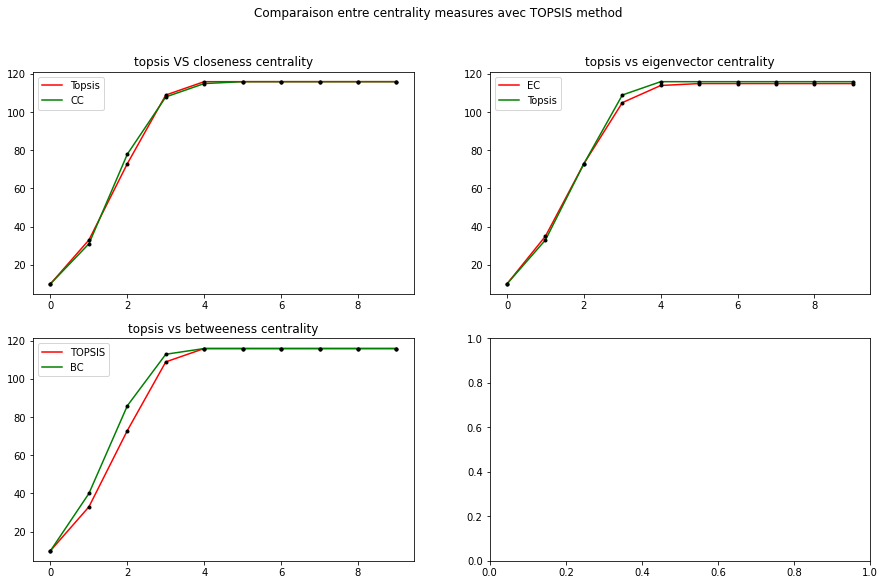

In [12]:
fig, ax = plt.subplots(2, 2,figsize=(15, 9))

ax[0, 0].set_title('topsis VS closeness centrality')
ax[0, 0].plot(sorted(topsis.keys()), meansTOPSIS, label='Topsis',c='red')
ax[0, 0].errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
ax[0, 0].plot(sorted(cc.keys()) , meansCC, label='CC',c='green')
ax[0, 0].errorbar(cc.keys() , meansCC, yerr=stdsCC, fmt ='.k')

ax[0, 0].legend()

ax[0, 1].set_title('topsis vs eigenvector centrality')
ax[0, 1].plot(sorted(ec.keys()) , meansEC, label='EC',c='red')
ax[0, 1].errorbar(ec.keys() , meansEC, yerr=stdsEC, fmt ='.k')
ax[0, 1].plot(sorted(topsis.keys()), meansTOPSIS, label='Topsis',c='green')
ax[0, 1].errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
ax[0, 1].legend()

ax[1, 0].plot(sorted(topsis.keys()), meansTOPSIS, label='TOPSIS',c='red')
ax[1, 0].errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
ax[1, 0].plot(sorted(bc.keys()) , meansBC, label='BC',c='green')
ax[1, 0].errorbar(bc.keys() , meansBC, yerr=stdsBC, fmt ='.k')
ax[1, 0].set_title('topsis vs betweeness centrality')
ax[1, 0].legend()


fig.suptitle('Comparaison entre centrality measures avec TOPSIS method')
plt.show()

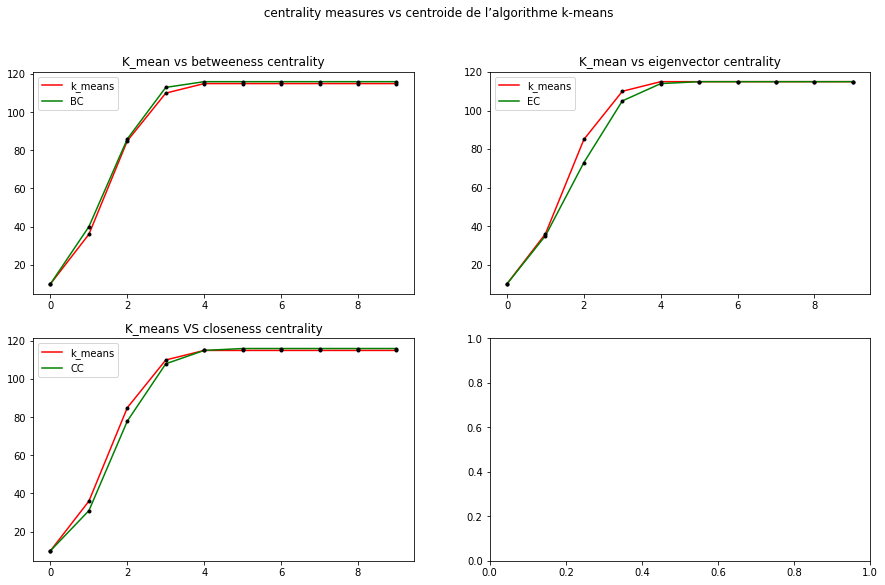

In [13]:
fig, ax = plt.subplots(2, 2,figsize=(15, 9))


ax[1, 0].set_title('K_means VS closeness centrality')
ax[1, 0].plot(sorted(kmeans.keys()) , meansKMEANS, label='k_means',c='red')
ax[1, 0].errorbar(sorted(kmeans.keys()) , meansKMEANS, yerr=stdsKMEANS, fmt ='.k')
ax[1, 0].plot(sorted(cc.keys()) , meansCC, label='CC',c='green')
ax[1, 0].errorbar(cc.keys() , meansCC, yerr=stdsCC, fmt ='.k')

ax[1, 0].legend()

ax[0, 1].set_title('K_mean vs eigenvector centrality')
ax[0, 1].plot(sorted(kmeans.keys()) , meansKMEANS, label='k_means',c='red')
ax[0, 1].errorbar(sorted(kmeans.keys()) , meansKMEANS, yerr=stdsKMEANS, fmt ='.k')
ax[0, 1].plot(sorted(ec.keys()) , meansEC, label='EC',c='green')
ax[0, 1].errorbar(ec.keys() , meansEC, yerr=stdsEC, fmt ='.k')
ax[0, 1].legend()

ax[0, 0].set_title('K_mean vs betweeness centrality')
ax[0, 0].plot(sorted(kmeans.keys()) , meansKMEANS, label='k_means',c='red')
ax[0, 0].errorbar(sorted(kmeans.keys()) , meansKMEANS, yerr=stdsKMEANS, fmt ='.k')
ax[0, 0].plot(sorted(bc.keys()) , meansBC, label='BC',c='green')
ax[0, 0].errorbar(bc.keys() , meansBC, yerr=stdsBC, fmt ='.k')
ax[0, 0].legend()


fig.suptitle(' centrality measures vs centroide de l’algorithme k-means ')
plt.show()

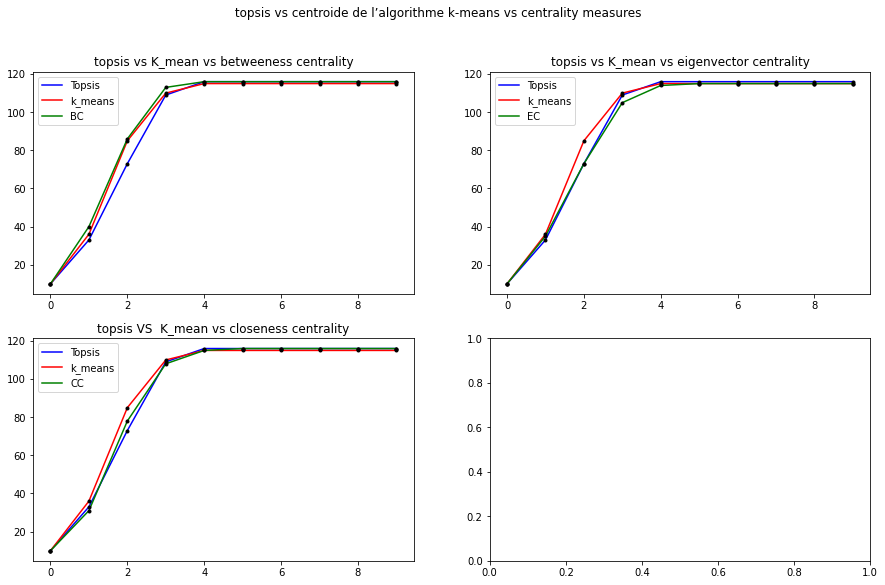

In [14]:
fig, ax = plt.subplots(2, 2,figsize=(15, 9))


ax[1, 0].set_title('topsis VS  K_mean vs closeness centrality')
ax[1,0].plot(sorted(topsis.keys()), meansTOPSIS, label='Topsis',c='blue')
ax[1,0].errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
ax[1, 0].plot(sorted(kmeans.keys()) , meansKMEANS, label='k_means',c='red')
ax[1, 0].errorbar(sorted(kmeans.keys()) , meansKMEANS, yerr=stdsKMEANS, fmt ='.k')
ax[1, 0].plot(sorted(cc.keys()) , meansCC, label='CC',c='green')
ax[1, 0].errorbar(cc.keys() , meansCC, yerr=stdsCC, fmt ='.k')

ax[1, 0].legend()

ax[0, 1].set_title('topsis vs K_mean vs eigenvector centrality')
ax[0, 1].plot(sorted(topsis.keys()), meansTOPSIS, label='Topsis',c='blue')
ax[0, 1].errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
ax[0, 1].plot(sorted(kmeans.keys()) , meansKMEANS, label='k_means',c='red')
ax[0, 1].errorbar(sorted(kmeans.keys()) , meansKMEANS, yerr=stdsKMEANS, fmt ='.k')
ax[0, 1].plot(sorted(ec.keys()) , meansEC, label='EC',c='green')
ax[0, 1].errorbar(ec.keys() , meansEC, yerr=stdsEC, fmt ='.k')
ax[0, 1].legend()

ax[0, 0].set_title('topsis vs K_mean vs betweeness centrality')
ax[0, 0].plot(sorted(topsis.keys()), meansTOPSIS, label='Topsis',c='blue')
ax[0, 0].errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
ax[0, 0].plot(sorted(kmeans.keys()) , meansKMEANS, label='k_means',c='red')
ax[0, 0].errorbar(sorted(kmeans.keys()) , meansKMEANS, yerr=stdsKMEANS, fmt ='.k')
ax[0, 0].plot(sorted(bc.keys()) , meansBC, label='BC',c='green')
ax[0, 0].errorbar(bc.keys() , meansBC, yerr=stdsBC, fmt ='.k')
ax[0, 0].legend()


fig.suptitle(' topsis vs centroide de l’algorithme k-means vs centrality measures ')
plt.show()

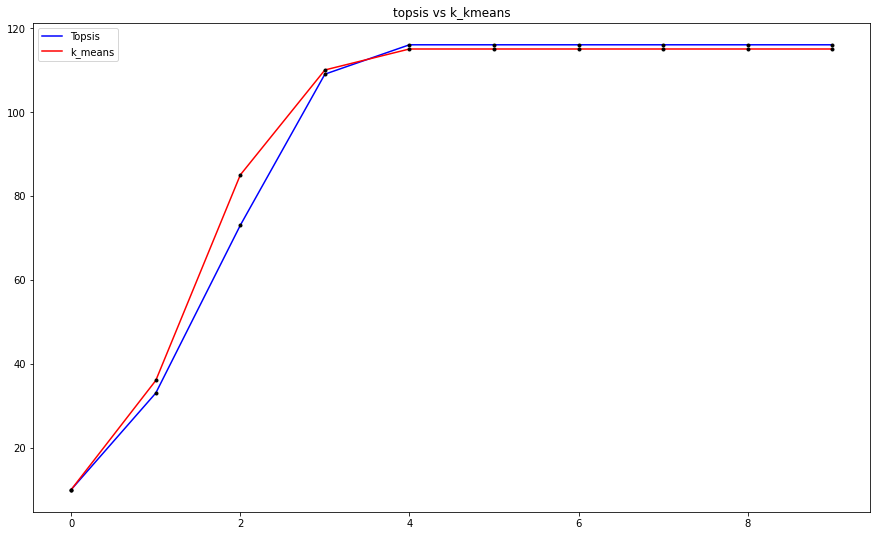

In [15]:
fig = plt.subplots(figsize=(15, 9))

plt.plot(sorted(topsis.keys()), meansTOPSIS, label='Topsis',c='blue')
plt.errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
plt.plot(sorted(kmeans.keys()) , meansKMEANS, label='k_means',c='red')
plt.errorbar(sorted(kmeans.keys()) , meansKMEANS, yerr=stdsKMEANS, fmt ='.k')
plt.title('topsis vs k_kmeans')

plt.legend()